In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams["figure.figsize"]=30,16

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Subsequent_funded_2_n.xlsx")
df.head(2)

,OpportunityID,OpportunityName,Renewal_OpportunityID,Renewal_PreviousCollectionStatus,Renewal_PreviousOpportunityID,Renewal_PreviousCreatedDate,Renewal_PreviousRenewals_Manager,Renewal_PreviouszzStatus,Renewal_PreviousPace,Renewal_PreviousDaysSinceLastPayment,...,HB_with_LCF_Payment__c,HBwoLCF,Contract_HoldBack__c,AvgMonthRevenue,AvgDailyBalance,NewDeal_YN,ActiveDeal_YN,WriteOff_YN,FundedWriteOffAmount_Gross,FundedWriteOffAmount_Net
0,0062M00000bmHA5QAM,Hafteh Bazaar Magazine-Renewal Deal-12192018,0062M00000bmHA5QAM,Default,0064100000b8jUhAAI,2018-11-06 19:57:54,Monique Williams,Renewed - PIF,100.0,0.0,...,223.08,NaN,40,1873.33,432.67,0.0,0.0,0.0,NaN,NaN
1,0062M00000bmhkAQAQ,Triple J Enterprises-Renewal Deal-12312018,0062M00000bmhkAQAQ,Other,0064100000b8R6zAAE,2018-11-05 14:22:56,Syed Salman,Renewed - PIF,100.0,0.0,...,56.37,38.0,18,11316.67,1060.00,0.0,0.0,1.0,2416.0,2416.0


In [ ]:
print("No. of features:", len(df.columns))
print("No. of rows:", len(df[:]))

No. of features: 39
No. of rows: 2895


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 39 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   OpportunityID                         2895 non-null   object        
 1   OpportunityName                       2895 non-null   object        
 2   Renewal_OpportunityID                 2895 non-null   object        
 3   Renewal_PreviousCollectionStatus      2895 non-null   object        
 4   Renewal_PreviousOpportunityID         2895 non-null   object        
 5   Renewal_PreviousCreatedDate           2895 non-null   datetime64[ns]
 6   Renewal_PreviousRenewals_Manager      2753 non-null   object        
 7   Renewal_PreviouszzStatus              2895 non-null   object        
 8   Renewal_PreviousPace                  2883 non-null   float64       
 9   Renewal_PreviousDaysSinceLastPayment  2890 non-null   float64       
 10  

In [ ]:
numerical_attributes = df.columns[df.dtypes!="object"]
categorical_attributes = df.columns[df.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 24 

Index(['Renewal_PreviousPace', 'Renewal_PreviousDaysSinceLastPayment',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_PreviousCreditScore',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousHBwoLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'Time_in_Business__c',
       'HB_with_LCF_Payment__c', 'HBwoLCF', 'Contract_HoldBack__c',
       'AvgMonthRevenue', 'NewDeal_YN', 'ActiveDeal_YN', 'WriteOff_YN',
       'Is_this_Business_home_based__c_Yes'],
      dtype='object')


Categorical_attributes : 0 

Index([], dtype='object')


In [ ]:
# Dropped unnecessary categoricals features

df =  df.drop(['OpportunityID', 'OpportunityName',
                    'Renewal_OpportunityID',
                    'Renewal_PreviousOpportunityID',
                    'Renewal_PreviousCollectionStatus',
                    'Renewal_PreviousRenewals_Manager',
                    'Renewal_PreviouszzStatus'
                    ], axis=1)

In [ ]:
df.shape

(2895, 32)

In [ ]:
df.iloc[0:2,26:32]

,AvgDailyBalance,NewDeal_YN,ActiveDeal_YN,WriteOff_YN,FundedWriteOffAmount_Gross,FundedWriteOffAmount_Net
0,432.67,0.0,0.0,0.0,NaN,NaN
1,1060.00,0.0,0.0,1.0,2416.0,2416.0


In [ ]:
# Dropped unnecessary numerical features

df =  df.drop(['Renewal_PreviousCreatedDate'], axis=1)

In [ ]:
df.shape

(2895, 31)

In [ ]:
# # Create Data audit Report for continuous variables
# def continuous_var_summary(x):
#     return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),
#                       x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
#                           x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75),
#                               x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()],
#                   index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1',
#                                'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [ ]:
# continuous_var_summary(df['SubsequentFunding_PreviousPace'])

In [ ]:
df.describe()

,Renewal_PreviousPace,Renewal_PreviousDaysSinceLastPayment,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousHBwoLCF,Renewal_PreviousAvgMonthRevenue,...,HB_with_LCF_Payment__c,HBwoLCF,Contract_HoldBack__c,AvgMonthRevenue,AvgDailyBalance,NewDeal_YN,ActiveDeal_YN,WriteOff_YN,FundedWriteOffAmount_Gross,FundedWriteOffAmount_Net
count,2883.000000,2890.000000,2895.000000,2868.000000,2895.000000,2895.000000,2888.000000,2895.000000,1772.000000,2.362000e+03,...,2895.000000,1411.000000,2895.000000,2.554000e+03,2.647000e+03,2893.0,2893.000000,2893.000000,731.000000,731.000000
mean,98.442036,0.272318,0.751288,547.055788,2.337478,2.757168,1.982687,31.819358,17.966185,6.078688e+04,...,34.578553,21.425734,19.962694,7.019500e+04,1.095547e+04,0.0,0.027999,0.252679,9112.417688,7773.138796
std,6.607444,13.262594,0.230348,155.179517,1.948302,7.352707,1.308248,225.264809,59.861520,1.915252e+05,...,224.602418,63.560654,8.914668,3.077549e+05,6.764055e+04,0.0,0.164997,0.434623,22766.963524,21873.134260
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-3.078490e+03,...,0.000000,0.000000,12.000000,-3.078490e+03,-7.183880e+03,0.0,0.000000,0.000000,0.000000,0.000000
25%,100.000000,0.000000,0.570000,529.000000,1.000000,0.000000,1.000000,8.805000,0.000000,1.356551e+04,...,11.490000,0.000000,12.000000,1.522062e+04,1.357785e+03,0.0,0.000000,0.000000,1030.750000,0.000000
50%,100.000000,0.000000,0.690000,577.000000,2.000000,0.000000,2.000000,19.580000,3.000000,2.389897e+04,...,20.700000,9.000000,17.000000,2.725934e+04,3.145460e+03,0.0,0.000000,0.000000,3674.000000,2272.000000
75%,100.000000,0.000000,0.940000,621.000000,3.000000,2.000000,3.000000,33.445000,25.000000,5.013473e+04,...,35.310000,30.000000,25.000000,5.608476e+04,7.536665e+03,0.0,0.000000,1.000000,8656.970000,7295.080000
max,100.000000,710.000000,2.180000,815.000000,18.000000,83.000000,15.000000,11539.840000,2098.000000,5.223195e+06,...,11539.840000,2098.000000,40.000000,1.241704e+07,3.129067e+06,0.0,1.000000,1.000000,317759.340000,317759.340000


In [ ]:
df['WriteOff_YN'].value_counts()

0.0    2162
1.0     731
Name: WriteOff_YN, dtype: int64

In [ ]:
df['WriteOff_YN'].shape

(2895,)

In [ ]:
df['WriteOff_YN'].isnull().sum()

2

In [ ]:
df[df['WriteOff_YN'].isnull()]

,Renewal_PreviousPace,Renewal_PreviousDaysSinceLastPayment,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousHBwoLCF,Renewal_PreviousAvgMonthRevenue,...,HB_with_LCF_Payment__c,HBwoLCF,Contract_HoldBack__c,AvgMonthRevenue,AvgDailyBalance,NewDeal_YN,ActiveDeal_YN,WriteOff_YN,FundedWriteOffAmount_Gross,FundedWriteOffAmount_Net
1710,100.0,0.0,1.0,617.0,1,0,4.0,0.00,65.0,0.0,...,88.60,12.0,40,34042.67,4321.39,NaN,NaN,NaN,NaN,NaN
2766,100.0,0.0,1.0,668.0,1,0,3.0,71.88,46.0,16925.0,...,23.82,NaN,24,21019.72,2498.69,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(index=[1710, 2766], inplace = True)

In [ ]:
df['WriteOff_YN'].isnull().sum()

0

## Checking_duplicacy_of_data



In [ ]:
print(df.duplicated(keep='first'), '\n')
print(df.duplicated().sum())
df[df.duplicated()]

0       False
1       False
2       False
3       False
4       False
        ...  
2890    False
2891    False
2892    False
2893    False
2894    False
Length: 2893, dtype: bool 

0


,Renewal_PreviousPace,Renewal_PreviousDaysSinceLastPayment,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousHBwoLCF,Renewal_PreviousAvgMonthRevenue,...,HB_with_LCF_Payment__c,HBwoLCF,Contract_HoldBack__c,AvgMonthRevenue,AvgDailyBalance,NewDeal_YN,ActiveDeal_YN,WriteOff_YN,FundedWriteOffAmount_Gross,FundedWriteOffAmount_Net


## Checking_missing_values_for_each_numerical_attributes

In [ ]:
df[numerical_attributes].isnull().sum().sort_values(ascending=False)

FundedWriteOffAmount_Net                2162
FundedWriteOffAmount_Gross              2162
HBwoLCF                                 1483
Renewal_PreviousHBwoLCF                 1123
LastBankStatement_OverdraftDays          769
Renewal_PreviousAvgMonthRevenue          533
AvgMonthRevenue                          341
Renewal_PreviousAvgDailyBalance          292
AvgDailyBalance                          248
BankStatement_MA_OverdraftDays            28
BankStatement_MA_NumReturnItems           28
BankStatement_Sum_NumReturnItems          28
Renewal_PreviousCreditScore               27
Credit_Score__c                           18
Renewal_PreviousPace                      12
Renewal_PreviousPosition                   7
Renewal_PreviousDaysSinceLastPayment       5
Time_in_Business__c                        1
Renewal_CountPreviousDeals                 0
Renewal_PreviousPaidPercentageOfRTR        0
WriteOff_YN                                0
ActiveDeal_YN                              0
NewDeal_YN

In [ ]:
df[numerical_attributes].isnull().sum().sort_values(ascending=False)/len(df)*100 # In Percentages %

FundedWriteOffAmount_Net                74.732112
FundedWriteOffAmount_Gross              74.732112
HBwoLCF                                 51.261666
Renewal_PreviousHBwoLCF                 38.817836
LastBankStatement_OverdraftDays         26.581403
Renewal_PreviousAvgMonthRevenue         18.423782
AvgMonthRevenue                         11.787072
Renewal_PreviousAvgDailyBalance         10.093329
AvgDailyBalance                          8.572416
BankStatement_MA_OverdraftDays           0.967853
BankStatement_MA_NumReturnItems          0.967853
BankStatement_Sum_NumReturnItems         0.967853
Renewal_PreviousCreditScore              0.933287
Credit_Score__c                          0.622191
Renewal_PreviousPace                     0.414794
Renewal_PreviousPosition                 0.241963
Renewal_PreviousDaysSinceLastPayment     0.172831
Time_in_Business__c                      0.034566
Renewal_CountPreviousDeals               0.000000
Renewal_PreviousPaidPercentageOfRTR      0.000000


In [ ]:
# Dropped features having > 50% missing values

df =  df.drop(['FundedWriteOffAmount_Net', 'FundedWriteOffAmount_Gross'], axis=1)

In [ ]:
df.shape

(2893, 29)

#### Checking_missing_values_for_each_categorical_attributes

In [ ]:
df[categorical_attributes].isnull().sum().sort_values(ascending=False)

Is_this_Business_home_based__c    1
dtype: int64

In [ ]:
df[categorical_attributes].isnull().sum().sort_values(ascending=False)/len(df)*100    # In Percentages %

Is_this_Business_home_based__c    0.034566
dtype: float64

In [ ]:
df[df['Is_this_Business_home_based__c'].isnull()]

,Renewal_PreviousPace,Renewal_PreviousDaysSinceLastPayment,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousHBwoLCF,Renewal_PreviousAvgMonthRevenue,...,Is_this_Business_home_based__c,BBC_Position__c,HB_with_LCF_Payment__c,HBwoLCF,Contract_HoldBack__c,AvgMonthRevenue,AvgDailyBalance,NewDeal_YN,ActiveDeal_YN,WriteOff_YN
928,100.0,0.0,1.0,585.0,1,0,1.0,0.0,NaN,NaN,...,NaN,1,15.18,NaN,15,10931.44,1353.68,0.0,0.0,0.0


In [ ]:
df.drop(index=[928], inplace = True)

In [ ]:
df.shape

(2892, 29)

## Getting the highly correlated features

In [ ]:
cor=df.corr()
cor

,Renewal_PreviousPace,Renewal_PreviousDaysSinceLastPayment,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousHBwoLCF,Renewal_PreviousAvgMonthRevenue,...,Time_in_Business__c,BBC_Position__c,HB_with_LCF_Payment__c,HBwoLCF,Contract_HoldBack__c,AvgMonthRevenue,AvgDailyBalance,NewDeal_YN,ActiveDeal_YN,WriteOff_YN
Renewal_PreviousPace,1.000000,-0.038061,-0.036642,-0.000022,-0.054334,-0.226613,-0.008546,-0.013086,0.003826,-0.015652,...,0.015809,-0.005987,-0.000305,0.008150,-0.014110,-0.033848,0.001020,NaN,-0.066957,0.016379
Renewal_PreviousDaysSinceLastPayment,-0.038061,1.000000,0.014749,0.011242,0.014858,0.046763,-0.014800,-0.002891,-0.005166,-0.004189,...,-0.004995,-0.013571,-0.001918,-0.008939,-0.014099,-0.003610,-0.002773,NaN,-0.003491,-0.011544
Renewal_PreviousPaidPercentageOfRTR,-0.036642,0.014749,1.000000,0.016435,-0.025846,0.381014,0.082615,0.019528,0.002511,0.023628,...,0.022597,0.056460,0.022861,0.009094,-0.080265,0.054474,0.029359,NaN,0.020262,-0.068108
Renewal_PreviousCreditScore,-0.000022,0.011242,0.016435,1.000000,0.051493,0.023625,0.124281,0.013057,0.043152,0.093414,...,0.109442,0.110746,0.016770,0.071911,-0.019851,0.070139,0.048761,NaN,0.031191,-0.066935
Renewal_CountPreviousDeals,-0.054334,0.014858,-0.025846,0.051493,1.000000,0.074055,-0.037817,0.028551,0.044634,0.020143,...,0.187559,-0.056819,0.025573,0.030911,0.081349,0.018000,0.012961,NaN,0.023180,-0.098698
Renewal_PreviousCountBounces,-0.226613,0.046763,0.381014,0.023625,0.074055,1.000000,0.024044,-0.011102,0.008946,0.051623,...,0.000567,-0.033126,-0.000089,-0.019985,-0.046172,0.026160,-0.007889,NaN,0.101280,0.028821
Renewal_PreviousPosition,-0.008546,-0.014800,0.082615,0.124281,-0.037817,0.024044,1.000000,0.021319,0.298505,0.215878,...,0.138619,0.841260,0.042226,0.280476,-0.103026,0.163392,0.100026,NaN,-0.021723,0.008028
Renewal_PreviousHBwLCF,-0.013086,-0.002891,0.019528,0.013057,0.028551,-0.011102,0.021319,1.000000,0.266436,-0.018720,...,0.002818,0.015473,0.008627,0.011116,0.048300,0.031243,0.004629,NaN,-0.007696,-0.015194
Renewal_PreviousHBwoLCF,0.003826,-0.005166,0.002511,0.043152,0.044634,0.008946,0.298505,0.266436,1.000000,-0.000915,...,0.049874,0.269125,0.025316,0.208031,0.015564,0.064813,0.008575,NaN,0.004529,0.002343
Renewal_PreviousAvgMonthRevenue,-0.015652,-0.004189,0.023628,0.093414,0.020143,0.051623,0.215878,-0.018720,-0.000915,1.000000,...,0.075931,0.227257,0.013679,0.151013,-0.084856,0.471522,0.318738,NaN,0.020852,0.009940


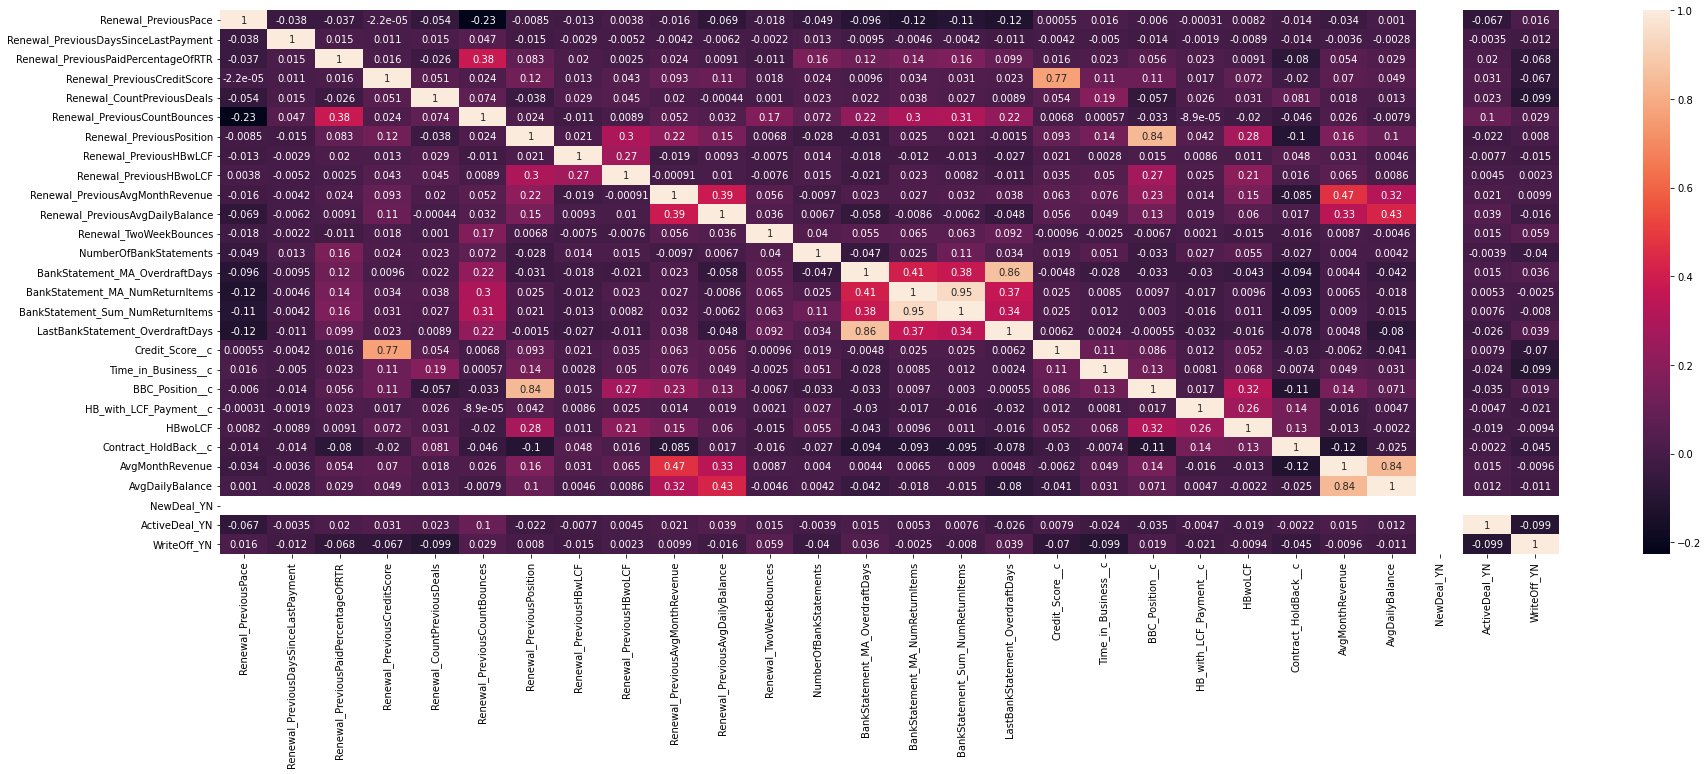

In [ ]:
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True)
rcParams["figure.figsize"]=32,12

## This is function which returns the highly correlated features :-

* These correlated features having similar information of other features in the dataset.
* So we can drop these features while building the model.

In [ ]:
def corelation(df,thresold):
    cor_cor=set()
    cor_matrix=df.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if (cor_matrix.iloc[i,j])>thresold:
                colname=cor_matrix.columns[i]
                cor_cor.add(colname)
    return cor_cor

In [ ]:
cor_features=corelation(df,0.7)
print(len(set(cor_features)),'\n')
cor_features

5 



{'AvgDailyBalance',
 'BBC_Position__c',
 'BankStatement_Sum_NumReturnItems',
 'Credit_Score__c',
 'LastBankStatement_OverdraftDays'}

In [ ]:
# Dropped another numerical features because of high correlation with other features (Providing the same information)

df =  df.drop(['AvgDailyBalance', 'BBC_Position__c',
                    'BankStatement_Sum_NumReturnItems',
                    'Credit_Score__c',
                    'LastBankStatement_OverdraftDays'
                    ], axis=1)

In [ ]:
df.shape

(2892, 24)

## Getting the numerical features for plotting the graphs

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Renewal_PreviousPace,Renewal_PreviousDaysSinceLastPayment,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousHBwoLCF,Renewal_PreviousAvgMonthRevenue,...,BankStatement_MA_OverdraftDays,BankStatement_MA_NumReturnItems,Time_in_Business__c,HB_with_LCF_Payment__c,HBwoLCF,Contract_HoldBack__c,AvgMonthRevenue,NewDeal_YN,ActiveDeal_YN,WriteOff_YN
0,100.0,0.0,0.75,534.0,1,4,1.0,0.0,NaN,NaN,...,2.0,1.333333,18.51,223.08,NaN,40,1873.33,0.0,0.0,0.0
1,100.0,0.0,0.55,537.0,1,0,2.0,0.0,NaN,NaN,...,0.0,0.000000,1.16,56.37,38.0,18,11316.67,0.0,0.0,1.0
2,100.0,0.0,0.69,0.0,2,0,2.0,0.0,NaN,NaN,...,NaN,NaN,9.22,0.00,NaN,12,NaN,0.0,0.0,1.0
3,100.0,0.0,0.54,0.0,1,0,2.0,0.0,NaN,NaN,...,3.0,0.000000,1.76,0.00,NaN,12,NaN,0.0,0.0,1.0
4,100.0,0.0,0.67,524.0,1,0,1.0,0.0,NaN,NaN,...,0.0,0.000000,5.01,0.00,NaN,12,NaN,0.0,0.0,1.0


In [ ]:
df_num.describe()

,Renewal_PreviousPace,Renewal_PreviousDaysSinceLastPayment,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousHBwoLCF,Renewal_PreviousAvgMonthRevenue,...,BankStatement_MA_OverdraftDays,BankStatement_MA_NumReturnItems,Time_in_Business__c,HB_with_LCF_Payment__c,HBwoLCF,Contract_HoldBack__c,AvgMonthRevenue,NewDeal_YN,ActiveDeal_YN,WriteOff_YN
count,2880.000000,2887.000000,2892.000000,2865.000000,2892.000000,2892.000000,2885.000000,2892.000000,1770.000000,2.360000e+03,...,2864.000000,2864.000000,2891.000000,2892.000000,1410.000000,2892.000000,2.551000e+03,2892.0,2892.000000,2892.000000
mean,98.440413,0.272601,0.751030,546.975916,2.338866,2.760028,1.981976,31.827510,17.923774,6.083122e+04,...,1.270164,1.078387,7.555936,34.570301,21.432418,19.956086,7.025168e+04,0.0,0.028008,0.252766
std,6.610694,13.269482,0.230328,155.237180,1.948836,7.355984,1.308123,225.378872,59.881185,1.916002e+05,...,2.723459,3.431979,10.230043,224.716298,63.582709,8.910707,3.079313e+05,0.0,0.165025,0.434673
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-3.078490e+03,...,0.000000,0.000000,-1.070000,0.000000,0.000000,12.000000,-3.078490e+03,0.0,0.000000,0.000000
25%,100.000000,0.000000,0.570000,529.000000,1.000000,0.000000,1.000000,8.825000,0.000000,1.358530e+04,...,0.000000,0.000000,1.870000,11.487500,0.000000,12.000000,1.522156e+04,0.0,0.000000,0.000000
50%,100.000000,0.000000,0.690000,577.000000,2.000000,0.000000,2.000000,19.585000,2.500000,2.390242e+04,...,0.000000,0.000000,4.020000,20.685000,9.000000,17.000000,2.728512e+04,0.0,0.000000,0.000000
75%,100.000000,0.000000,0.940000,621.000000,3.000000,2.000000,3.000000,33.442500,24.750000,5.015812e+04,...,1.333333,0.666666,9.270000,35.310000,30.000000,25.000000,5.612700e+04,0.0,0.000000,1.000000
max,100.000000,710.000000,2.180000,815.000000,18.000000,83.000000,15.000000,11539.840000,2098.000000,5.223195e+06,...,31.333333,98.333333,115.290000,11539.840000,2098.000000,40.000000,1.241704e+07,0.0,1.000000,1.000000


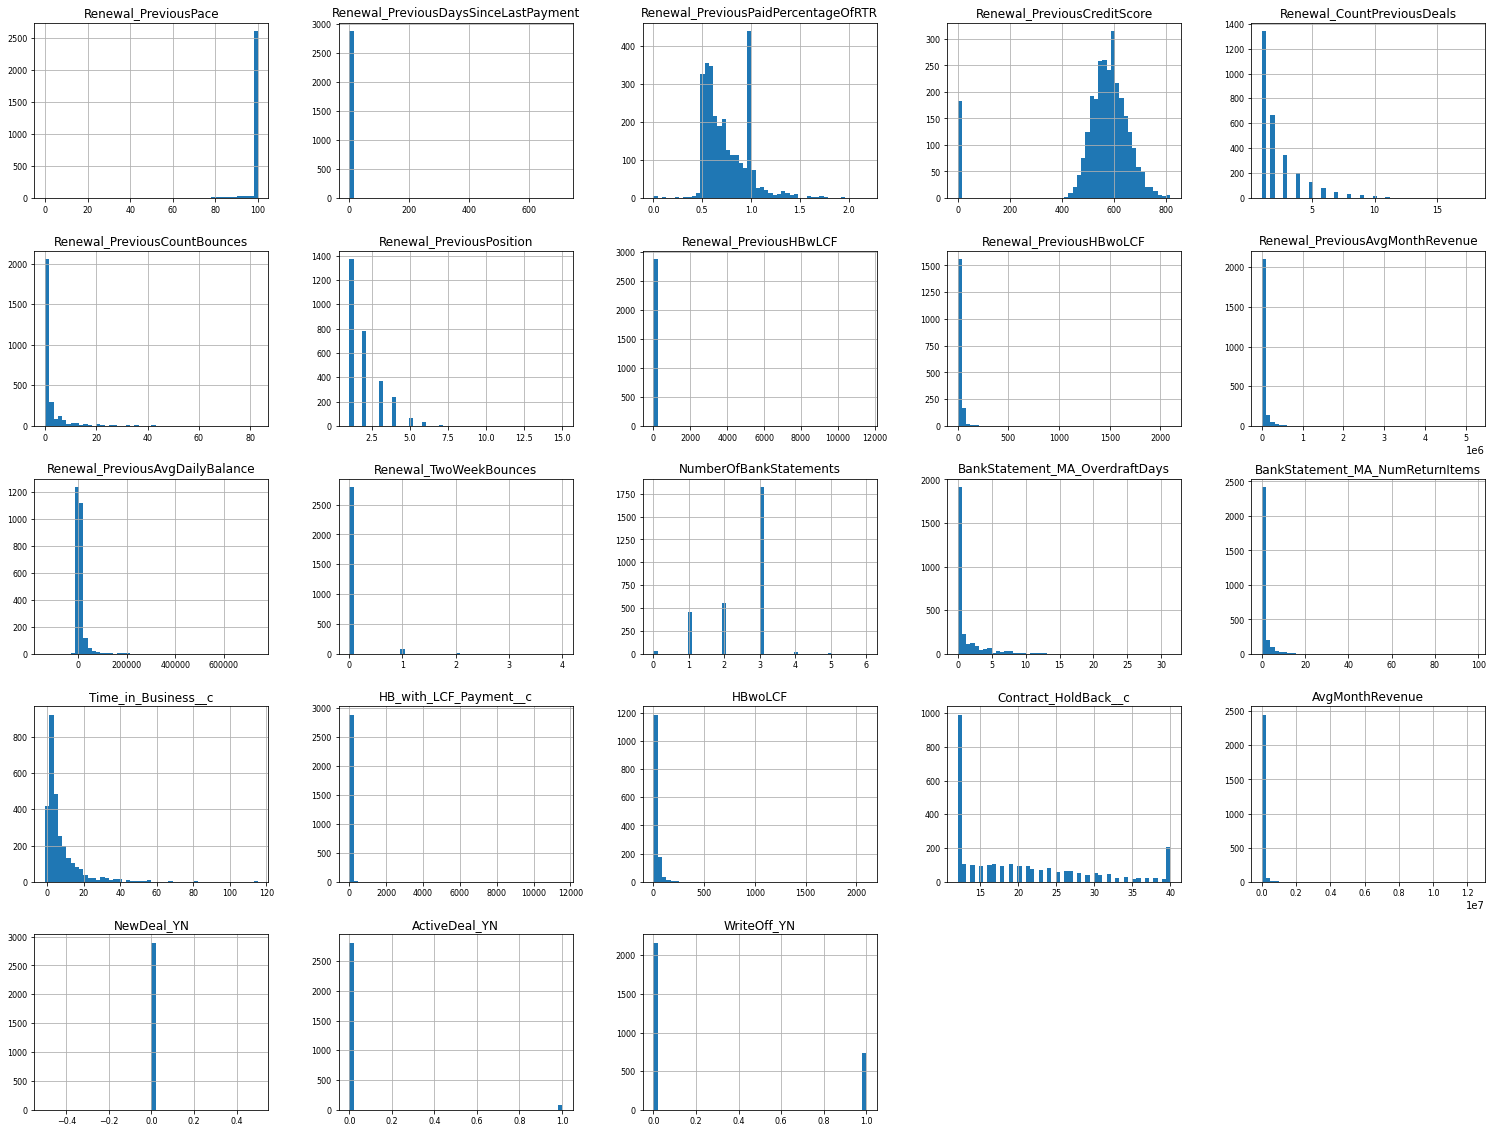

In [ ]:
df_num.hist(figsize=(26, 20), bins=50, xlabelsize=8, ylabelsize=8); # avoid having the matplotlib verbose informations

# Distribution of numerical data

In [ ]:
numerical_attributes

Index(['Renewal_PreviousPace', 'Renewal_PreviousDaysSinceLastPayment',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_PreviousCreditScore',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousHBwoLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'Time_in_Business__c',
       'HB_with_LCF_Payment__c', 'HBwoLCF', 'Contract_HoldBack__c',
       'AvgMonthRevenue', 'NewDeal_YN', 'ActiveDeal_YN', 'WriteOff_YN',
       'Is_this_Business_home_based__c_Yes'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


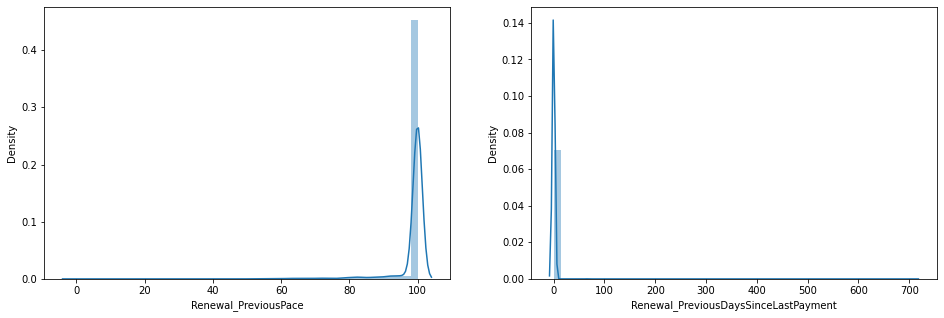

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Renewal_PreviousPace'])
plt.subplot(1,2,2)
sns.distplot(df['Renewal_PreviousDaysSinceLastPayment'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


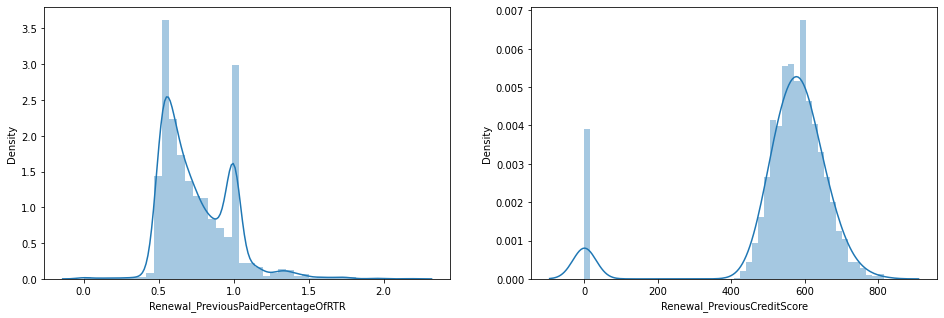

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Renewal_PreviousPaidPercentageOfRTR'])
plt.subplot(1,2,2)
sns.distplot(df['Renewal_PreviousCreditScore'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


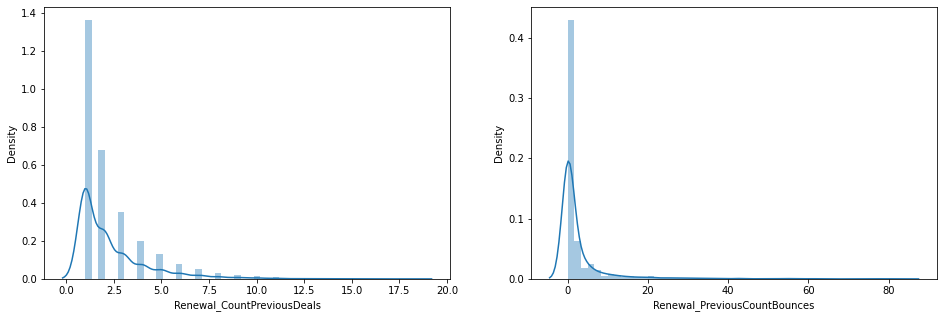

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Renewal_CountPreviousDeals'])
plt.subplot(1,2,2)
sns.distplot(df['Renewal_PreviousCountBounces'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


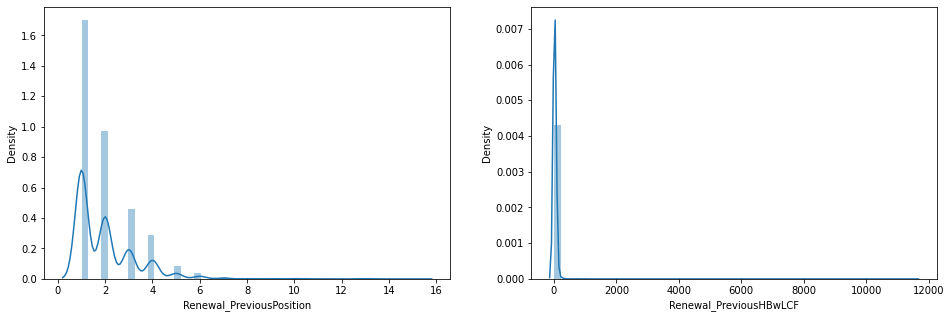

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Renewal_PreviousPosition'])
plt.subplot(1,2,2)
sns.distplot(df['Renewal_PreviousHBwLCF'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


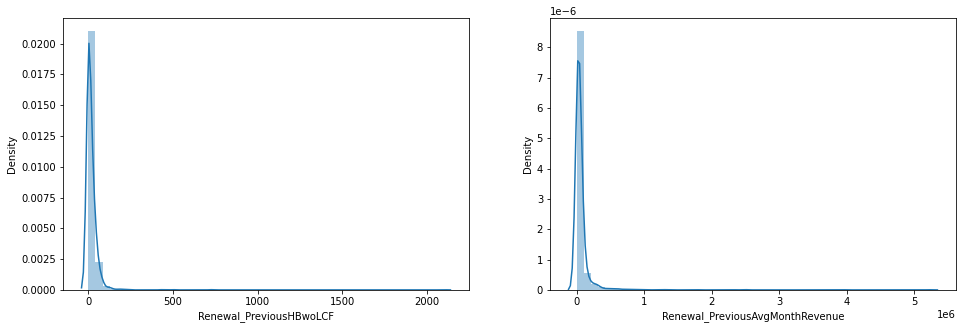

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Renewal_PreviousHBwoLCF'])
plt.subplot(1,2,2)
sns.distplot(df['Renewal_PreviousAvgMonthRevenue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


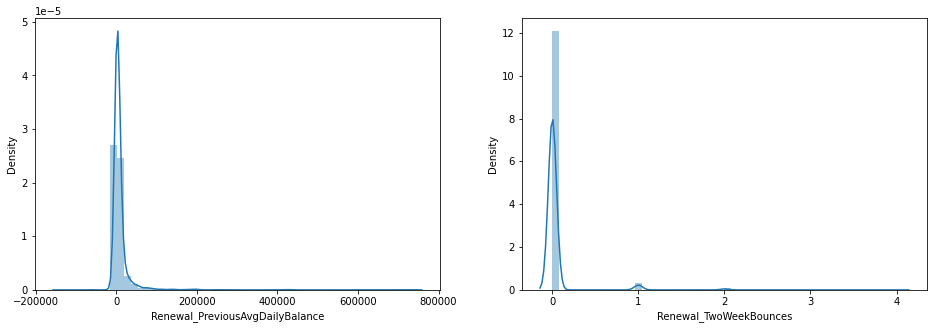

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Renewal_PreviousAvgDailyBalance'])
plt.subplot(1,2,2)
sns.distplot(df['Renewal_TwoWeekBounces'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


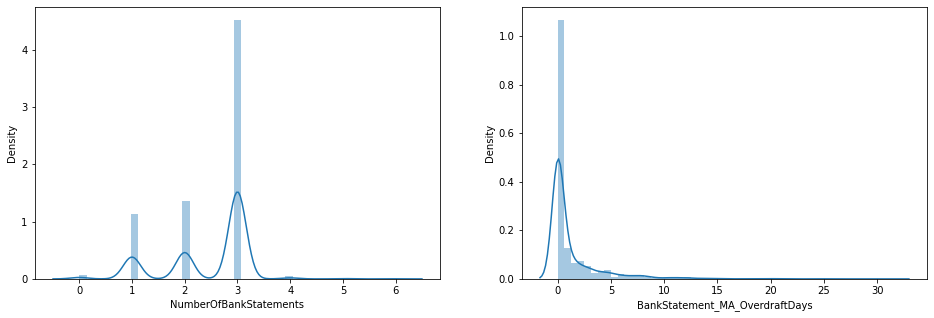

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['NumberOfBankStatements'])
plt.subplot(1,2,2)
sns.distplot(df['BankStatement_MA_OverdraftDays'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


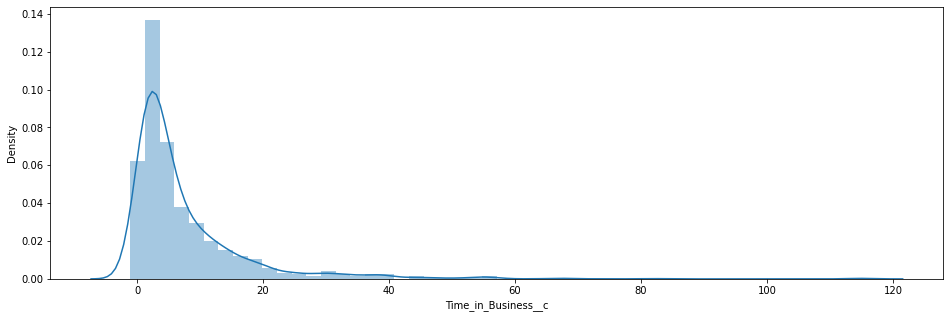

In [ ]:
plt.figure(figsize=(16,5))
# plt.subplot(1,2,1)
sns.distplot(df['Time_in_Business__c'])
# plt.subplot(1,2,2)
# sns.distplot(df['BBC_Position__c'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


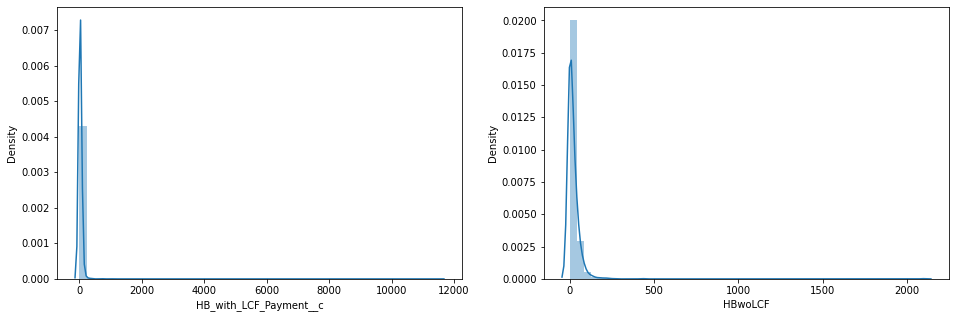

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['HB_with_LCF_Payment__c'])
plt.subplot(1,2,2)
sns.distplot(df['HBwoLCF'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


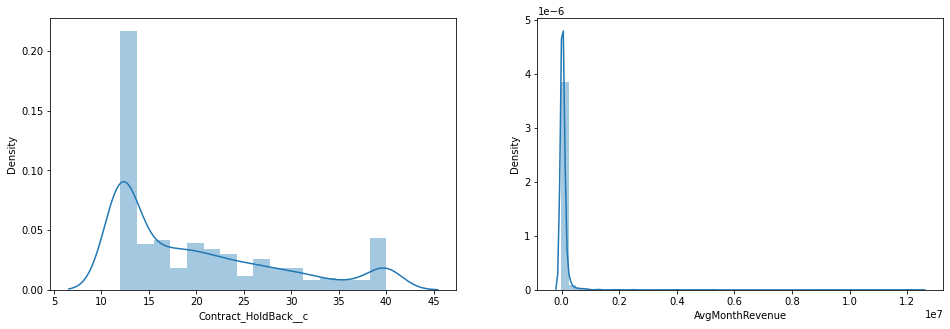

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Contract_HoldBack__c'])
plt.subplot(1,2,2)
sns.distplot(df['AvgMonthRevenue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


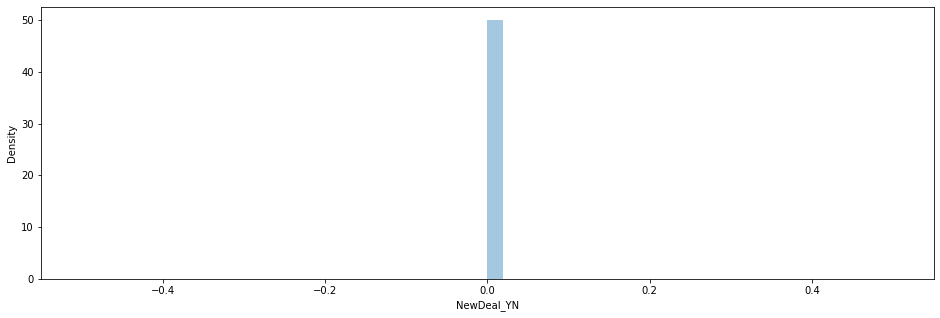

In [ ]:
plt.figure(figsize=(16,5))
# plt.subplot(1,2,1)
# sns.distplot(df['AvgDailyBalance'])
# plt.subplot(1,2,2)
sns.distplot(df['NewDeal_YN'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


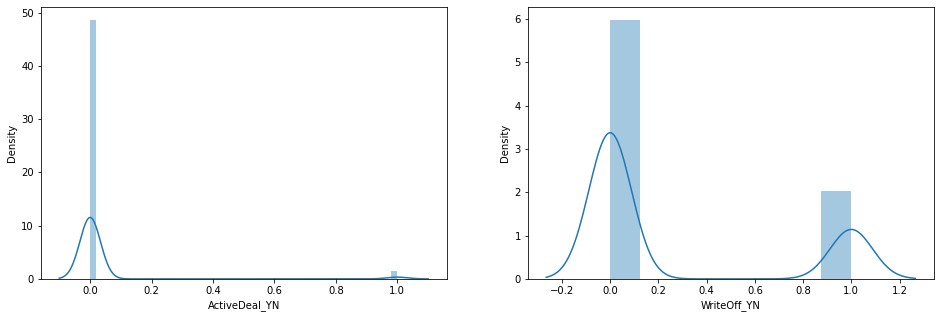

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['ActiveDeal_YN'])
plt.subplot(1,2,2)
sns.distplot(df['WriteOff_YN'])
plt.show()

In [ ]:
df.columns

Index(['Renewal_PreviousPace', 'Renewal_PreviousDaysSinceLastPayment',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_PreviousCreditScore',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousHBwoLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'Time_in_Business__c',
       'HB_with_LCF_Payment__c', 'HBwoLCF', 'Contract_HoldBack__c',
       'AvgMonthRevenue', 'NewDeal_YN', 'ActiveDeal_YN', 'WriteOff_YN',
       'Is_this_Business_home_based__c_Yes'],
      dtype='object')

## Using one hot encoding to convert 'Is_this_Business_home_based__c' to integer

In [ ]:
is_home_based = pd.get_dummies(df,  columns = ['Is_this_Business_home_based__c'], drop_first=True)

In [ ]:
is_home_based

,Renewal_PreviousPace,Renewal_PreviousDaysSinceLastPayment,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousHBwoLCF,Renewal_PreviousAvgMonthRevenue,...,BankStatement_MA_NumReturnItems,Time_in_Business__c,HB_with_LCF_Payment__c,HBwoLCF,Contract_HoldBack__c,AvgMonthRevenue,NewDeal_YN,ActiveDeal_YN,WriteOff_YN,Is_this_Business_home_based__c_Yes
0,100.00,0.0,0.75,534.0,1,4,1.0,0.00,NaN,NaN,...,1.333333,18.51,223.08,NaN,40,1873.33,0.0,0.0,0.0,0
1,100.00,0.0,0.55,537.0,1,0,2.0,0.00,NaN,NaN,...,0.000000,1.16,56.37,38.0,18,11316.67,0.0,0.0,1.0,0
2,100.00,0.0,0.69,0.0,2,0,2.0,0.00,NaN,NaN,...,NaN,9.22,0.00,NaN,12,NaN,0.0,0.0,1.0,0
3,100.00,0.0,0.54,0.0,1,0,2.0,0.00,NaN,NaN,...,0.000000,1.76,0.00,NaN,12,NaN,0.0,0.0,1.0,0
4,100.00,0.0,0.67,524.0,1,0,1.0,0.00,NaN,NaN,...,0.000000,5.01,0.00,NaN,12,NaN,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,100.00,0.0,0.56,611.0,1,0,1.0,31.13,0.0,5026.00,...,0.000000,0.91,39.65,NaN,40,6763.58,0.0,0.0,1.0,0
2891,77.93,0.0,0.56,659.0,2,15,1.0,9.92,NaN,200359.15,...,19.333333,1.03,4.44,NaN,12,880725.23,0.0,1.0,0.0,1
2892,100.00,0.0,0.53,736.0,2,0,4.0,13.69,NaN,28565.08,...,0.000000,12.91,13.24,NaN,13,29542.38,0.0,0.0,0.0,1
2893,100.00,0.0,0.55,641.0,1,0,1.0,13.13,0.0,62318.62,...,0.000000,1.52,14.13,NaN,14,72944.80,0.0,1.0,0.0,1


In [ ]:
df = is_home_based

In [ ]:
df

,Renewal_PreviousPace,Renewal_PreviousDaysSinceLastPayment,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousHBwoLCF,Renewal_PreviousAvgMonthRevenue,...,BankStatement_MA_NumReturnItems,Time_in_Business__c,HB_with_LCF_Payment__c,HBwoLCF,Contract_HoldBack__c,AvgMonthRevenue,NewDeal_YN,ActiveDeal_YN,WriteOff_YN,Is_this_Business_home_based__c_Yes
0,100.00,0.0,0.75,534.0,1,4,1.0,0.00,NaN,NaN,...,1.333333,18.51,223.08,NaN,40,1873.33,0.0,0.0,0.0,0
1,100.00,0.0,0.55,537.0,1,0,2.0,0.00,NaN,NaN,...,0.000000,1.16,56.37,38.0,18,11316.67,0.0,0.0,1.0,0
2,100.00,0.0,0.69,0.0,2,0,2.0,0.00,NaN,NaN,...,NaN,9.22,0.00,NaN,12,NaN,0.0,0.0,1.0,0
3,100.00,0.0,0.54,0.0,1,0,2.0,0.00,NaN,NaN,...,0.000000,1.76,0.00,NaN,12,NaN,0.0,0.0,1.0,0
4,100.00,0.0,0.67,524.0,1,0,1.0,0.00,NaN,NaN,...,0.000000,5.01,0.00,NaN,12,NaN,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,100.00,0.0,0.56,611.0,1,0,1.0,31.13,0.0,5026.00,...,0.000000,0.91,39.65,NaN,40,6763.58,0.0,0.0,1.0,0
2891,77.93,0.0,0.56,659.0,2,15,1.0,9.92,NaN,200359.15,...,19.333333,1.03,4.44,NaN,12,880725.23,0.0,1.0,0.0,1
2892,100.00,0.0,0.53,736.0,2,0,4.0,13.69,NaN,28565.08,...,0.000000,12.91,13.24,NaN,13,29542.38,0.0,0.0,0.0,1
2893,100.00,0.0,0.55,641.0,1,0,1.0,13.13,0.0,62318.62,...,0.000000,1.52,14.13,NaN,14,72944.80,0.0,1.0,0.0,1


In [ ]:
# Renewal_PreviousPaidPercentageOfRTR
# Renewal_PreviousCreditScore
# Renewal_PreviousDaysSinceLastPayment
# Renewal_PreviousCountBounces
# Is_this_Business_home_based__c_Yes

# Now started building the base model

In [ ]:
df2 = df[['Renewal_PreviousPaidPercentageOfRTR', 'Renewal_PreviousCreditScore', 'Renewal_PreviousDaysSinceLastPayment',
         'Renewal_PreviousCountBounces', 'Is_this_Business_home_based__c_Yes', 'WriteOff_YN']]
df2

,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_PreviousDaysSinceLastPayment,Renewal_PreviousCountBounces,Is_this_Business_home_based__c_Yes,WriteOff_YN
0,0.75,534.0,0.0,4,0,0.0
1,0.55,537.0,0.0,0,0,1.0
2,0.69,0.0,0.0,0,0,1.0
3,0.54,0.0,0.0,0,0,1.0
4,0.67,524.0,0.0,0,0,1.0
...,...,...,...,...,...,...
2890,0.56,611.0,0.0,0,0,1.0
2891,0.56,659.0,0.0,15,1,0.0
2892,0.53,736.0,0.0,0,1,0.0
2893,0.55,641.0,0.0,0,1,0.0


In [ ]:
df2['Renewal_PreviousCreditScore'].fillna(df2['Renewal_PreviousCreditScore'].mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df2['Renewal_PreviousDaysSinceLastPayment'].fillna(df2['Renewal_PreviousDaysSinceLastPayment'].mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df2['Renewal_PreviousDaysSinceLastPayment'].isnull().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df2[['Renewal_PreviousPaidPercentageOfRTR', 'Renewal_PreviousCreditScore', 'Renewal_PreviousDaysSinceLastPayment', 'Renewal_PreviousCountBounces', 'Is_this_Business_home_based__c_Yes']]

In [ ]:
X

,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_PreviousDaysSinceLastPayment,Renewal_PreviousCountBounces,Is_this_Business_home_based__c_Yes
0,0.75,534.0,0.0,4,0
1,0.55,537.0,0.0,0,0
2,0.69,0.0,0.0,0,0
3,0.54,0.0,0.0,0,0
4,0.67,524.0,0.0,0,0
...,...,...,...,...,...
2890,0.56,611.0,0.0,0,0
2891,0.56,659.0,0.0,15,1
2892,0.53,736.0,0.0,0,1
2893,0.55,641.0,0.0,0,1


In [ ]:
y = df2['WriteOff_YN']

In [ ]:
y

0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2890    1.0
2891    0.0
2892    0.0
2893    0.0
2894    0.0
Name: WriteOff_YN, Length: 2892, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_PreviousDaysSinceLastPayment,Renewal_PreviousCountBounces,Is_this_Business_home_based__c_Yes
343,0.81,564.0,0.0,11,0
2656,0.83,530.0,0.0,1,0
2886,0.55,0.0,0.0,0,1
2146,0.52,587.0,0.0,0,0
1989,1.00,552.0,0.0,5,1
...,...,...,...,...,...
1639,0.66,612.0,0.0,11,1
1096,0.57,551.0,0.0,0,1
1131,0.52,532.0,0.0,0,1
1295,0.93,515.0,0.0,0,0


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2024, 5), (868, 5), (2024,), (868,))

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.26678966,  0.10957864, -0.02259373,  1.1020232 , -0.88058991],
       [ 0.35495003, -0.10765645, -0.02259373, -0.24432494, -0.88058991],
       [-0.87929517, -3.49396809, -0.02259373, -0.37895975,  1.13560238],
       ...,
       [-1.01153573, -0.09487791, -0.02259373, -0.37895975,  1.13560238],
       [ 0.79575189, -0.20349545, -0.02259373, -0.37895975, -0.88058991],
       [ 1.1043132 , -0.39517347, -0.02259373, -0.37895975, -0.88058991]])

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[645,   0],
       [222,   1]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85       645
         1.0       1.00      0.00      0.01       223

    accuracy                           0.74       868
   macro avg       0.87      0.50      0.43       868
weighted avg       0.81      0.74      0.64       868



# Improvements -

* Data Prep[rocessing - EDA part
  1. Remove all the unnecessary categorical as well as numerical features     including 'ActiveDeal_YN'.
  2. Handle all the missing values.
    * 'Is this business home based'
    * 'Writeoff_YN' (Target Variable)
    * Print all the rows with missing values in the features so as to defend.
    * How to deal with missing values in categorical features.
    * Drop the missing values in target feature.
  3. Use any encoding method according to the research.
  4. Handle all the missing values on numerical features.
   * LastBankStatement_OverdraftDays         26.581403
Renewal_PreviousAvgMonthRevenue         18.423782,
AvgMonthRevenue                         11.787072,
Renewal_PreviousAvgDailyBalance         10.093329,
AvgDailyBalance                          8.572416,
BankStatement_MA_OverdraftDays           0.967853,
BankStatement_MA_NumReturnItems          0.967853,
BankStatement_Sum_NumReturnItems         0.967853,
Renewal_PreviousCreditScore              0.933287,
Credit_Score__c                          0.622191,
Renewal_PreviousPace                     0.414794,
Renewal_PreviousPosition                 0.241963,
Renewal_PreviousDaysSinceLastPayment     0.172831,
Time_in_Business__c                      0.034566.

   * Check the unique values of features having less the 1% missing values(Check - Describe, Unique, Distribution graph).
   * Replace misiing values by (mean, median, mode) according to graph distribution.
   * Plot the PDA to check outliers or skewness in the data.  